# Filtering for entries with Humboldt County

Humboldt County has the most obligations in the dataset, prompting us to wonder what types of obligations are going to this county.

In [1]:
import pandas as pd
from siuba import *
import numpy as np
from sqlalchemy import create_engine
from siuba.sql import LazyTbl
from plotnine import *

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.


In [2]:
from dla_utils import _dla_utils

/opt/conda/lib/python3.9/site-packages/google/auth/_default.py:79: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
/opt/conda/lib/python3.9/site-packages/google/auth/_default.py:79: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
/opt/conda/lib

In [59]:
df= pd.read_parquet("gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/dla_df.parquet")

In [4]:
df.head()

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,...,0.00,Large,0,0,1,0,0,0,0,1
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,"11,508.00",...,0.00,Large,0,0,0,0,0,1,0,1
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,"45,499.64",...,0.00,Large,0,0,0,0,0,1,0,1
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,"207,002.00",...,0.00,Large,1,0,0,0,0,1,0,2
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,...,"6,130,295.48",Large,0,0,0,1,0,0,0,1


In [5]:
df.primary_agency_name.value_counts().sort_values(ascending=False)

Humboldt County                              713
Los Angeles                                  508
Los Angeles County                           488
Santa Cruz County                            482
Fresno                                       471
                                            ... 
Tri Delta Transit                              1
Alameda Corridor Transportation Authority      1
La Jolla Band of Luiseno Indians               1
Weed                                           1
Hermosa Beach                                  1
Name: primary_agency_name, Length: 619, dtype: int64

In [6]:
df >> filter(_.primary_agency_name.str.contains("Humboldt County"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,...,0.00,Large,0,0,1,0,0,0,0,1
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,"45,499.64",...,0.00,Large,0,0,0,0,0,1,0,1
61,Obligated,BPMP,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,"21,619.00",...,0.00,Large,0,0,1,0,0,1,0,2
179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,"80,597.93",...,0.00,Large,0,0,0,1,0,1,0,2
180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,"7,797.89",...,0.00,Large,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21370,HQ,ACSTER,40A0(059),Humboldt County,2022-02-25,2022-03-09,2022-03-16,NaT,NaT,0.00,...,"1,563,395.98",Large,0,0,0,0,0,1,0,1
21411,FMIS,BPMP,5904(156),Humboldt County,2021-08-05,2022-03-29,2022-04-08,2022-04-13,2022-04-13,"-55,208.90",...,0.00,Large,0,0,1,0,0,1,0,2
21413,FMIS,ACSTER,40A0(057),Humboldt County,2022-02-25,2022-02-25,2022-03-14,2022-04-12,2022-04-12,0.00,...,"948,677.46",Large,0,0,0,0,0,1,0,1
21460,Obligated,ER,32L0(278),Humboldt County,2022-02-25,2022-03-09,2022-03-15,2022-04-05,2022-04-08,"1,333,817.77",...,0.00,Large,0,0,0,0,0,1,0,1


In [7]:
df_hc = df >> filter(_.primary_agency_name.str.contains("Humboldt County"))

In [8]:
print(len(df_hc))

713


In [9]:
df_hc >> count(_.locode) >> arrange(-_.n)

,locode,n
0,5904,713


### What Prefix Codes are fequently used?

In [10]:
(_dla_utils.find_top(df_hc))>>filter(_.variable=="prefix")

,value,count,variable
0,ER,445,prefix
1,ACSTER,72,prefix
2,BPMP,54,prefix
3,ACSTP,30,prefix
4,BRLO,27,prefix
5,BRLS,22,prefix
6,HSIPL,19,prefix
7,RPSTPL,18,prefix
8,BRLOZB,9,prefix
9,HRRRL,6,prefix


In [11]:
# ER funds, or emergency relief funds, are the most obligated type of funding to the county.

In [12]:
df_hc >> filter(_.prefix=='ER')>> summarize(avgfunds= _.total_requested.sum())

,avgfunds
0,"13,857,562.39"


#### What Project IDs occur the most?

In [13]:
df_hc >> group_by(_.prefix) >> count(_.projectID) >> arrange(-_.n)


,prefix,projectID,n
14,ER,32L0,193
12,ER,20A0,148
0,ACSTER,32L0,66
7,BPMP,5904,54
16,ER,4400,52
17,ER,4820,31
8,BRLO,5904,27
10,BRLS,5904,22
20,HSIPL,5904,19
21,RPSTPL,5904,18


In [14]:
_dla_utils.get_nunique(df_hc, 'projectID', 'prefix')

,prefix,n
9,ER,6
0,ACSTER,3
1,ACSTP,2
2,ATPL,1
3,ATPLNI,1
4,BPMP,1
5,BRLO,1
6,BRLOZB,1
7,BRLS,1
8,BRLSZD,1


In [15]:
df_hc >> group_by(_.prefix) >> count(_.project_no) >> arrange(-_.n)


,prefix,project_no,n
92,BRLO,5904(126),8
101,BRLS,5904(127),8
91,BRLO,5904(113),7
287,HSIPL,5904(160),6
290,RPSTPL,5904(106),6
...,...,...,...
269,ER,4820(007),1
274,ER,4820(017),1
282,FBDLNI,5904(130),1
296,RPSTPLE,5904(128),1


In [16]:
_dla_utils.get_nunique(df_hc, 'project_no', 'prefix')

,prefix,n
9,ER,177
0,ACSTER,50
1,ACSTP,22
4,BPMP,16
5,BRLO,6
7,BRLS,6
13,RPSTPL,6
12,HSIPL,5
6,BRLOZB,2
11,HRRRL,2


In [17]:
# interesting that when we group by the 7-digit project numberm, the top is no longer ER. 

In [18]:
df_hc >> filter(_.prefix=='BRLO', _.project_no=='5904(126)') 


,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
2512,Obligated,BRLO,5904(126),Humboldt County,2017-11-08,2018-02-06,2018-02-09,2018-02-09,2018-02-15,"346,000.00",...,0.00,Large,0,0,1,0,0,1,0,2
4407,Obligated,BRLO,5904(126),Humboldt County,2017-04-27,2017-05-10,2017-05-11,2017-05-15,2017-05-16,"505,000.00",...,0.00,Large,0,0,1,0,0,1,0,2
4866,Obligated,BRLO,5904(126),Humboldt County,2016-10-31,2017-03-03,2017-03-06,2017-03-06,2017-03-07,"130,000.00",...,0.00,Large,0,0,1,0,0,1,0,2
9958,Obligated,BRLO,5904(126),Humboldt County,2015-02-02,2015-02-03,2015-02-04,2015-02-04,2015-02-04,"109,000.00",...,0.00,Large,0,0,1,0,0,1,0,2
11835,Obligated,BRLO,5904(126),Humboldt County,2014-05-23,2014-05-23,2014-05-29,2014-05-29,2014-05-30,"-109,000.00",...,0.00,Large,0,0,1,0,0,1,0,2
13127,Obligated,BRLO,5904(126),Humboldt County,2019-03-20,2019-04-02,2019-04-11,2019-04-12,2019-04-15,"108,577.00",...,0.00,Large,0,0,1,0,0,1,0,2
15631,Obligated,BRLO,5904(126),Humboldt County,2020-01-22,2020-01-22,2020-01-30,2020-01-30,2020-01-31,"-21,691.16",...,0.00,Large,0,0,1,0,0,1,0,2
20748,Obligated,BRLO,5904(126),Humboldt County,2022-02-04,2022-02-04,2022-02-04,2022-02-04,2022-02-08,0.00,...,0.00,Large,0,0,1,0,0,1,0,2


##### Using funds from two sources for the same location

In [19]:
#trying something here 
(df_hc
     >> filter(_.project_location.str.contains("Jacoby Creek"))
     >> count(_.project_no)
)

,project_no,n
0,5904(126),8
1,5904(165),2


In [20]:
df_hc >> filter(_.project_location.str.contains("Jacoby Creek"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
941,Obligated,BRLO,5904(165),Humboldt County,2018-07-03,2018-07-06,2018-07-10,2018-07-10,2018-07-19,"22,655.00",...,0.00,Large,0,0,1,0,0,1,0,2
2512,Obligated,BRLO,5904(126),Humboldt County,2017-11-08,2018-02-06,2018-02-09,2018-02-09,2018-02-15,"346,000.00",...,0.00,Large,0,0,1,0,0,1,0,2
4407,Obligated,BRLO,5904(126),Humboldt County,2017-04-27,2017-05-10,2017-05-11,2017-05-15,2017-05-16,"505,000.00",...,0.00,Large,0,0,1,0,0,1,0,2
4866,Obligated,BRLO,5904(126),Humboldt County,2016-10-31,2017-03-03,2017-03-06,2017-03-06,2017-03-07,"130,000.00",...,0.00,Large,0,0,1,0,0,1,0,2
9958,Obligated,BRLO,5904(126),Humboldt County,2015-02-02,2015-02-03,2015-02-04,2015-02-04,2015-02-04,"109,000.00",...,0.00,Large,0,0,1,0,0,1,0,2
11835,Obligated,BRLO,5904(126),Humboldt County,2014-05-23,2014-05-23,2014-05-29,2014-05-29,2014-05-30,"-109,000.00",...,0.00,Large,0,0,1,0,0,1,0,2
13127,Obligated,BRLO,5904(126),Humboldt County,2019-03-20,2019-04-02,2019-04-11,2019-04-12,2019-04-15,"108,577.00",...,0.00,Large,0,0,1,0,0,1,0,2
15631,Obligated,BRLO,5904(126),Humboldt County,2020-01-22,2020-01-22,2020-01-30,2020-01-30,2020-01-31,"-21,691.16",...,0.00,Large,0,0,1,0,0,1,0,2
20370,Obligated,BRLO,5904(165),Humboldt County,2021-09-13,2021-11-18,2021-12-07,2021-12-13,2021-12-20,"-2,762.11",...,0.00,Large,0,0,1,0,0,1,0,2
20748,Obligated,BRLO,5904(126),Humboldt County,2022-02-04,2022-02-04,2022-02-04,2022-02-04,2022-02-08,0.00,...,0.00,Large,0,0,1,0,0,1,0,2


In [21]:
(df_hc >> filter(_.project_location.str.contains("Jacoby Creek")) 
     >> group_by(_.project_no)
     >> count(_.prepared_y)
     >> arrange(_.prepared_y)
)

,project_no,prepared_y,n
0,5904(126),"2,014.00",1
1,5904(126),"2,015.00",1
2,5904(126),"2,016.00",1
3,5904(126),"2,017.00",2
7,5904(165),"2,018.00",1
4,5904(126),"2,019.00",1
5,5904(126),"2,020.00",1
8,5904(165),"2,021.00",1
6,5904(126),"2,022.00",1


In [22]:
## we have two project numbers for the same bridge, with different funds around the same time

In [23]:
df_hc >> filter(_.prefix=='BRLS', _.project_no=='5904(127)') 


,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
2983,Obligated,BRLS,5904(127),Humboldt County,2017-07-13,2017-11-13,2017-11-20,2017-11-21,2017-11-30,"2,180,287.00",...,0.00,Large,0,0,1,0,0,1,0,2
6674,Obligated,BRLS,5904(127),Humboldt County,2016-05-17,2016-05-25,2016-05-26,2016-05-26,2016-06-02,"138,992.00",...,0.00,Large,0,0,1,0,0,1,0,2
8726,Obligated,BRLS,5904(127),Humboldt County,2015-07-13,2015-07-13,2015-07-14,2015-07-14,2015-07-15,"17,706.00",...,0.00,Large,0,0,1,0,0,1,0,2
9950,Obligated,BRLS,5904(127),Humboldt County,2015-02-02,2015-02-04,2015-02-05,2015-02-05,2015-02-05,"203,619.00",...,0.00,Large,0,0,1,0,0,1,0,2
13123,Obligated,BRLS,5904(127),Humboldt County,2019-03-12,2019-04-02,2019-04-12,2019-04-15,2019-04-16,"192,163.00",...,0.00,Large,0,0,1,0,0,1,0,2
18500,Obligated,BRLS,5904(127),Humboldt County,2021-02-10,2021-02-10,2021-02-18,2021-02-25,2021-03-02,0.00,...,0.00,Large,0,0,1,0,0,1,0,2
19251,Obligated,BRLS,5904(127),Humboldt County,2021-04-29,2021-05-19,2021-05-28,2021-06-01,2021-06-15,"-48,480.20",...,0.00,Large,0,0,1,0,0,1,0,2
21234,DISTRICT,BRLS,5904(127),Humboldt County,2021-11-22,NaT,NaT,NaT,NaT,"44,351.32",...,0.00,Large,0,0,1,0,0,1,0,2


In [24]:
#trying this again with Williams Creek
(df_hc
     >> filter(_.project_location.str.contains("Williams Creek"))
     >> group_by(_.prefix, _.project_no, _.prepared_y)
     >> count(_.project_no)
)

,prefix,project_no,prepared_y,n
0,BRLOZB,5904(032),"2,015.00",1
1,BRLOZB,5904(032),"2,016.00",1
2,BRLOZB,5904(032),"2,017.00",2
3,BRLS,5904(127),"2,015.00",2
4,BRLS,5904(127),"2,016.00",1
5,BRLS,5904(127),"2,017.00",1
6,BRLS,5904(127),"2,019.00",1
7,BRLS,5904(127),"2,021.00",3
8,BRLS,5904(164),"2,018.00",1
9,BRLS,5904(164),"2,021.00",1


In [25]:
df_hc >> filter(_.project_location.str.contains("Williams Creek"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
557,Obligated,BRLS,5904(164),Humboldt County,2018-07-26,2018-07-26,2018-09-11,2018-09-12,2018-09-16,"47,480.00",...,0.00,Large,0,0,0,0,0,0,0,0
2983,Obligated,BRLS,5904(127),Humboldt County,2017-07-13,2017-11-13,2017-11-20,2017-11-21,2017-11-30,"2,180,287.00",...,0.00,Large,0,0,1,0,0,1,0,2
3963,Obligated,BRLOZB,5904(032),Humboldt County,2017-07-06,2017-07-06,2017-07-06,2017-07-06,2017-07-17,-55.96,...,0.00,Large,0,0,0,0,0,1,0,1
4326,Obligated,BRLOZB,5904(032),Humboldt County,2017-05-16,2017-05-16,2017-05-16,2017-05-16,2017-05-24,0.00,...,0.00,Large,0,0,0,0,0,1,0,1
6674,Obligated,BRLS,5904(127),Humboldt County,2016-05-17,2016-05-25,2016-05-26,2016-05-26,2016-06-02,"138,992.00",...,0.00,Large,0,0,1,0,0,1,0,2
7518,Obligated,BRLOZB,5904(032),Humboldt County,2016-01-27,2016-01-27,2016-01-27,2016-01-27,2016-01-29,-180.24,...,0.00,Large,0,0,0,0,0,1,0,1
8726,Obligated,BRLS,5904(127),Humboldt County,2015-07-13,2015-07-13,2015-07-14,2015-07-14,2015-07-15,"17,706.00",...,0.00,Large,0,0,1,0,0,1,0,2
9102,Obligated,BRLOZB,5904(032),Humboldt County,2015-05-04,2015-05-21,2015-06-08,2015-06-08,2015-06-09,"115,438.30",...,0.00,Large,0,0,0,0,0,1,0,1
9950,Obligated,BRLS,5904(127),Humboldt County,2015-02-02,2015-02-04,2015-02-05,2015-02-05,2015-02-05,"203,619.00",...,0.00,Large,0,0,1,0,0,1,0,2
13123,Obligated,BRLS,5904(127),Humboldt County,2019-03-12,2019-04-02,2019-04-12,2019-04-15,2019-04-16,"192,163.00",...,0.00,Large,0,0,1,0,0,1,0,2


In [26]:
#interesting. we have a bridge reconstruction going on with funds coming from two programs in the same timeframe 

### Looking into the Sequences

In [27]:
df_hc >> group_by(_.projectID, _.prefix) >> count(_.seq) >> arrange(-_.n)

,projectID,prefix,seq,n
17,32L0,ER,1,58
0,20A0,ER,2,49
19,32L0,ER,3,46
1,20A0,ER,3,38
2,20A0,ER,4,36
...,...,...,...,...
105,5904,RPSTPL,5,1
108,5904,RPSTPL,8,1
109,5904,RPSTPL,9,1
110,5904,RPSTPLE,4,1


In [28]:
# making sure this query looks at the number of seq for each 7-digit project code

df_hc >> filter(_.prefix == "ER", _.project_no == "32L0(329)")


,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
251,Obligated,ER,32L0(329),Humboldt County,2018-10-19,2018-10-19,2018-11-02,2018-11-06,2018-11-11,"26,293.41",...,0.00,Large,0,0,0,0,0,1,0,1
16969,Obligated,ER,32L0(329),Humboldt County,2020-07-07,2020-07-21,2020-07-28,2020-08-03,2020-08-06,"301,505.73",...,0.00,Large,0,0,0,0,0,1,0,1
17851,Obligated,ER,32L0(329),Humboldt County,2020-10-19,2020-10-19,2020-10-19,2020-12-24,2021-01-06,"3,355,955.40",...,"-3,513,616.86",Large,0,0,0,0,0,1,0,1


In [29]:
# There was a double entry here before removing duplicates. 

In [30]:
df_hc >> count(_.mpo)

,mpo,n
0,NON-MPO,713


In [31]:
df_hc >> filter(_.seq >= 9) >> arrange(_.project_no)

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
5280,Obligated,BRLSZD,5904(006),Humboldt County,2016-12-08,2016-12-08,2016-12-08,2016-12-08,2016-12-14,-228.08,...,0.00,Large,0,0,1,0,0,1,0,2
9844,Obligated,BRLSZD,5904(006),Humboldt County,2014-05-30,2015-02-04,2015-02-05,2015-02-20,2015-02-20,"-27,390.06",...,0.00,Large,0,0,1,0,0,1,0,2
3963,Obligated,BRLOZB,5904(032),Humboldt County,2017-07-06,2017-07-06,2017-07-06,2017-07-06,2017-07-17,-55.96,...,0.00,Large,0,0,0,0,0,1,0,1
4326,Obligated,BRLOZB,5904(032),Humboldt County,2017-05-16,2017-05-16,2017-05-16,2017-05-16,2017-05-24,0.00,...,0.00,Large,0,0,0,0,0,1,0,1
7518,Obligated,BRLOZB,5904(032),Humboldt County,2016-01-27,2016-01-27,2016-01-27,2016-01-27,2016-01-29,-180.24,...,0.00,Large,0,0,0,0,0,1,0,1
5412,Obligated,RPSTPL,5904(106),Humboldt County,2016-11-17,2016-11-17,2016-11-17,2016-11-17,2016-11-18,0.00,...,0.00,Large,1,0,0,0,0,0,0,1
20748,Obligated,BRLO,5904(126),Humboldt County,2022-02-04,2022-02-04,2022-02-04,2022-02-04,2022-02-08,0.00,...,0.00,Large,0,0,1,0,0,1,0,2
21234,DISTRICT,BRLS,5904(127),Humboldt County,2021-11-22,NaT,NaT,NaT,NaT,"44,351.32",...,0.00,Large,0,0,1,0,0,1,0,2


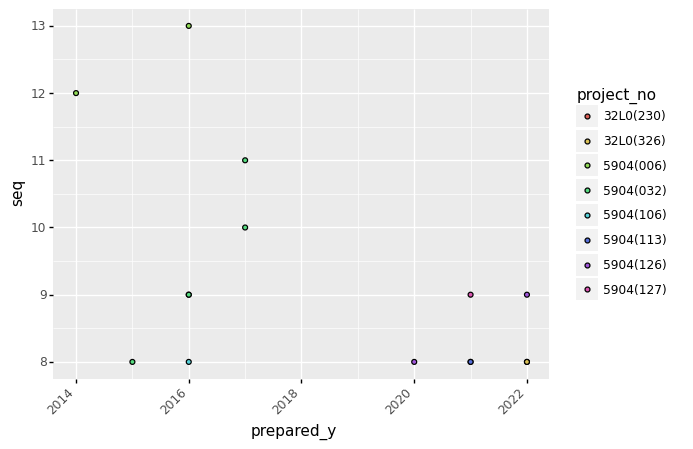

<ggplot: (8781976982414)>

In [32]:
#curious to see where/when the sequences fall on a timeline for different projects
(
    df_hc 
    >> filter(_.seq >= 8) 
    >> group_by(_.project_no)
    >> ggplot(aes("prepared_y", "seq", fill="project_no")) + geom_point() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
    
)

### ER Funds

#### Using ER funds for Mattole Road 

In [33]:
#just saw "Mattole Road" on the first entry. Searching using this string. 
df_hc >> filter(_.project_location.str.contains("Mattole R"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,"45,499.64",...,0.00,Large,0,0,0,0,0,1,0,1
61,Obligated,BPMP,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,"21,619.00",...,0.00,Large,0,0,1,0,0,1,0,2
179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,"80,597.93",...,0.00,Large,0,0,0,1,0,1,0,2
180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,"7,797.89",...,0.00,Large,0,0,0,0,0,1,0,1
182,Obligated,ER,32L0(164),Humboldt County,2018-11-15,2018-11-19,2018-11-19,2018-11-21,2018-11-28,"55,422.20",...,0.00,Large,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20978,Obligated,BPMP,5904(157),Humboldt County,2022-01-26,2022-03-09,2022-03-11,2022-03-11,2022-03-16,"1,638.21",...,0.00,Large,0,0,1,0,0,1,0,2
20979,Obligated,ER,32L0(417),Humboldt County,2022-02-25,2022-02-25,2022-02-25,2022-02-25,2022-03-04,"-29,216.41",...,0.00,Large,0,0,0,0,0,1,0,1
21333,HQ,ER,32L0(253),Humboldt County,2022-04-04,2022-04-04,NaT,NaT,NaT,0.00,...,"4,522.23",Large,0,0,0,0,0,1,0,1
21336,HQ,ER,40A0(015),Humboldt County,2022-03-17,2022-03-28,NaT,NaT,NaT,0.00,...,"68,196.90",Large,0,0,0,0,0,1,0,1


In [34]:
(df_hc >> filter(_.project_location.str.contains("Mattole R"))
     >> count(_.prefix))

,prefix,n
0,ACSTER,26
1,ACSTP,7
2,BPMP,4
3,BRLS,3
4,ER,140


In [35]:
(df_hc >> filter(_.project_location.str.contains("Mattole R"))
     >> group_by(_.prefix, _.prepared_y)
     >> count(_.project_no)
     >> arrange(-_.n)
)

,prefix,prepared_y,project_no,n
119,ER,"2,020.00",4400(017),3
43,ER,"2,015.00",20A0(041),2
46,ER,"2,015.00",20A0(050),2
47,ER,"2,015.00",4400(061),2
48,ER,"2,015.00",4820(003),2
...,...,...,...,...
141,ER,"2,022.00",32L0(253),1
142,ER,"2,022.00",32L0(325),1
143,ER,"2,022.00",32L0(417),1
144,ER,"2,022.00",40A0(015),1


In [36]:
(df_hc >> filter(_.project_location.str.contains("Mattole R"))
     >> group_by(_.prepared_y, _.prefix)
     >> count(_.type_of_work)
     >> arrange(-_.n)
)

,prepared_y,prefix,type_of_work,n
21,"2,018.00",ER,Storm Damage Restoration,26
38,"2,019.00",ER,Permanent Restoration,18
19,"2,018.00",ER,Permanent Restoration,15
28,"2,019.00",ACSTER,Permanent Restoration,9
69,"2,022.00",ER,Permanent Restoration,8
...,...,...,...,...
66,"2,022.00",BPMP,Bridge Preventive Maintenance: Replace Wood Wh...,1
67,"2,022.00",BRLS,Bridge Replacement (br # 04c0055),1
68,"2,022.00",ER,"Grind Existing Roadway, Recompact/augment Road...",1
70,"2,022.00",ER,Repair Roadway Slumping And Settlement.,1


#### ER project numbers

In [37]:
df_hc >> filter(_.prefix=="ER") >> count(_.projectID) >> arrange(-_.n)

,projectID,n
2,32L0,193
0,20A0,148
4,4400,52
5,4820,31
3,40A0,17
1,28L4,4


In [38]:
df_hc >> filter(_.prefix == "ER") >> count(_.project_no) >> arrange(-_.n)

,project_no,n
120,32L0(326),5
1,20A0(002),4
2,20A0(003),4
3,20A0(004),4
7,20A0(008),4
...,...,...
141,4400(020),1
159,4400(062),1
160,4400(071),1
164,4820(007),1


### What projects are grouped by date

In [39]:
df_hc.sample(3)

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
20703,Obligated,ER,20A0(030),Humboldt County,2022-02-04,2022-02-04,2022-02-04,2022-02-04,2022-02-08,0.00,...,0.00,Large,0,0,0,0,0,1,0,1
13102,Obligated,ER,32L0(234),Humboldt County,2018-11-26,2019-01-31,2019-03-13,2019-03-15,2019-03-19,"218,686.80",...,0.00,Large,0,0,0,0,0,1,0,1
3371,Obligated,ER,4820(019),Humboldt County,2017-10-02,2017-10-02,2017-10-02,2017-10-02,2017-10-13,-6.51,...,0.00,Large,0,0,0,0,0,1,0,1


In [40]:
(df_hc
    >> count(_.prepared_date) 
    >> arrange(-_.n)
    >> filter(_.n >= 5)
)

,prepared_date,n
356,2022-02-04,38
119,2018-03-22,17
120,2018-03-29,16
10,2014-05-22,13
209,2019-09-04,10
141,2018-07-30,9
231,2019-11-04,9
117,2018-03-19,8
211,2019-09-06,8
112,2018-01-19,7


#### March 22, 2018: 17 ER Entries

In [41]:
(df_hc
    >> filter(_.prepared_date=='2018-03-22') 
    >> count(_.prefix)
    >> arrange(-_.n)
)

,prefix,n
0,ER,17


In [42]:
(df_hc
    >> filter(_.prepared_date=='2018-03-22') 
)

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
1767,Obligated,ER,4400(050),Humboldt County,2018-03-22,2018-03-22,2018-04-27,2018-04-27,2018-05-01,-899.76,...,0.00,Large,0,0,0,0,0,1,0,1
1840,Obligated,ER,20A0(053),Humboldt County,2018-03-22,2018-03-23,2018-04-09,2018-04-09,2018-04-20,"-14,591.10",...,0.00,Large,0,0,0,0,0,1,0,1
1913,Obligated,ER,20A0(042),Humboldt County,2018-03-22,2018-03-23,2018-04-06,2018-04-06,2018-04-16,"5,183.44",...,0.00,Large,0,0,0,0,0,1,0,1
1914,Obligated,ER,20A0(048),Humboldt County,2018-03-22,2018-03-23,2018-04-09,2018-04-09,2018-04-16,"-17,213.28",...,0.00,Large,0,0,0,0,0,1,0,1
1915,Obligated,ER,20A0(051),Humboldt County,2018-03-22,2018-03-23,2018-04-09,2018-04-09,2018-04-16,"-17,493.33",...,0.00,Large,0,0,0,0,0,1,0,1
1917,Obligated,ER,20A0(017),Humboldt County,2018-03-22,2018-03-23,2018-04-09,2018-04-09,2018-04-16,"-91,981.36",...,0.00,Large,0,0,0,0,0,1,0,1
1961,Obligated,ER,20A0(055),Humboldt County,2018-03-22,2018-03-23,2018-04-03,2018-04-03,2018-04-13,"7,261.19",...,0.00,Large,0,0,0,0,0,1,0,1
2011,Obligated,ER,20A0(028),Humboldt County,2018-03-22,2018-03-23,2018-04-02,2018-04-02,2018-04-10,"2,645.20",...,0.00,Large,0,0,0,0,0,1,0,1
2013,Obligated,ER,20A0(031),Humboldt County,2018-03-22,2018-03-23,2018-04-02,2018-04-02,2018-04-10,"7,602.62",...,0.00,Large,0,0,0,0,0,1,0,1
2015,Obligated,ER,20A0(037),Humboldt County,2018-03-22,2018-03-23,2018-04-03,2018-04-03,2018-04-10,"11,398.21",...,0.00,Large,0,0,0,0,0,1,0,1


* Most of these are for Mattole Road, similar types of works, same phase, different sectiopns of the road

In [43]:
#checking to see if there were doubles in project location
(df_hc
    >> filter(_.prepared_date=='2018-03-22') 
    >> count(_.project_location)
)

,project_location,n
0,Alderpoint Road Pm 42.00 To 42.46,1
1,"Alderpoint Road, Pm 36.98",1
2,"Kneeland Road, Pm 0.26",1
3,"Kneeland Road, Pm 6.45",1
4,"Mattole Road (bull Creek), Pm 3.55",1
5,"Mattole Road, Pm 13.67",1
6,"Mattole Road, Pm 17.83",1
7,"Mattole Road, Pm 2.11",1
8,"Mattole Road, Pm 26.96",1
9,"Mattole Road, Pm 27.10",1


In [44]:
(df_hc
    >> filter(_.prepared_date=='2018-03-22') 
    >> count(_.type_of_work)
)

,type_of_work,n
0,Emergency Relief,1
1,Permanent Restoration,4
2,Storm Damage Restoration,12


In [45]:
(df_hc 
    >> group_by(_.prefix)
    >> count(_.prepared_y) 
    >> arrange(-_.n)
    >> filter(_.n > 5)
)

,prefix,prepared_y,n
52,ER,"2,018.00",146
53,ER,"2,019.00",82
56,ER,"2,022.00",61
54,ER,"2,020.00",47
0,ACSTER,"2,019.00",39
49,ER,"2,015.00",31
55,ER,"2,021.00",31
48,ER,"2,014.00",30
2,ACSTER,"2,021.00",15
1,ACSTER,"2,020.00",13


In [46]:
## looking for more instances of this project code 
df_hc >> filter(_.prefix == "ER", _.project_no == '32L0(434)')

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
14874,Obligated,ER,32L0(434),Humboldt County,2019-10-03,2019-10-03,2019-10-07,2019-10-09,2019-10-15,"4,337.97",...,"-4,597.79",Large,0,0,0,0,0,1,0,1
15622,Obligated,ER,32L0(434),Humboldt County,2019-11-05,2019-11-05,2020-01-08,2020-01-16,2020-01-21,"-4,337.97",...,0.00,Large,0,0,0,0,0,1,0,1


In [47]:
(df_hc 
    >> filter(_.prefix == "ER")
    >> group_by(_.prepared_y)
)

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,"45,499.64",...,0.00,Large,0,0,0,0,0,1,0,1
179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,"80,597.93",...,0.00,Large,0,0,0,1,0,1,0,2
180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,"7,797.89",...,0.00,Large,0,0,0,0,0,1,0,1
181,Obligated,ER,32L0(138),Humboldt County,2018-11-16,2018-11-19,2018-11-19,2018-11-21,2018-11-28,"11,764.54",...,0.00,Large,0,0,0,0,0,1,0,1
182,Obligated,ER,32L0(164),Humboldt County,2018-11-15,2018-11-19,2018-11-19,2018-11-21,2018-11-28,"55,422.20",...,0.00,Large,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21333,HQ,ER,32L0(253),Humboldt County,2022-04-04,2022-04-04,NaT,NaT,NaT,0.00,...,"4,522.23",Large,0,0,0,0,0,1,0,1
21334,HQ,ER,32L0(279),Humboldt County,2022-03-02,2022-04-04,NaT,NaT,NaT,0.00,...,"1,065,910.70",Large,0,0,0,0,0,1,0,1
21336,HQ,ER,40A0(015),Humboldt County,2022-03-17,2022-03-28,NaT,NaT,NaT,0.00,...,"68,196.90",Large,0,0,0,0,0,1,0,1
21368,HQ,ER,32L0(273),Humboldt County,2022-04-13,2022-04-13,2022-04-13,NaT,NaT,"325,933.93",...,"-314,134.61",Large,0,0,0,0,0,1,0,1


### Looking at Projects with 32L0


In [48]:
df_hc >> filter(_.projectID == "32L0")
             

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,"80,597.93",...,0.00,Large,0,0,0,1,0,1,0,2
180,Obligated,ER,32L0(136),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,"7,797.89",...,0.00,Large,0,0,0,0,0,1,0,1
181,Obligated,ER,32L0(138),Humboldt County,2018-11-16,2018-11-19,2018-11-19,2018-11-21,2018-11-28,"11,764.54",...,0.00,Large,0,0,0,0,0,1,0,1
182,Obligated,ER,32L0(164),Humboldt County,2018-11-15,2018-11-19,2018-11-19,2018-11-21,2018-11-28,"55,422.20",...,0.00,Large,0,0,0,0,0,1,0,1
183,Obligated,ER,32L0(219),Humboldt County,2018-11-07,2018-11-19,2018-11-19,2018-11-21,2018-11-28,"13,724.04",...,0.00,Large,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21333,HQ,ER,32L0(253),Humboldt County,2022-04-04,2022-04-04,NaT,NaT,NaT,0.00,...,"4,522.23",Large,0,0,0,0,0,1,0,1
21334,HQ,ER,32L0(279),Humboldt County,2022-03-02,2022-04-04,NaT,NaT,NaT,0.00,...,"1,065,910.70",Large,0,0,0,0,0,1,0,1
21368,HQ,ER,32L0(273),Humboldt County,2022-04-13,2022-04-13,2022-04-13,NaT,NaT,"325,933.93",...,"-314,134.61",Large,0,0,0,0,0,1,0,1
21460,Obligated,ER,32L0(278),Humboldt County,2022-02-25,2022-03-09,2022-03-15,2022-04-05,2022-04-08,"1,333,817.77",...,0.00,Large,0,0,0,0,0,1,0,1


In [49]:
df_hc >> filter(_.projectID == "32L0", _.type_of_work.str.contains("Roadway"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
179,Obligated,ER,32L0(132),Humboldt County,2018-11-09,2018-11-19,2018-11-19,2018-11-21,2018-11-28,"80,597.93",...,0.00,Large,0,0,0,1,0,1,0,2
1126,Obligated,ER,32L0(111),Humboldt County,2018-06-27,2018-06-27,2018-06-27,2018-06-27,2018-07-03,"7,657.84",...,"-8,263.59",Large,0,0,0,1,0,0,0,1
1130,Obligated,ER,32L0(127),Humboldt County,2018-06-25,2018-06-25,2018-06-28,2018-06-29,2018-07-03,"23,672.92",...,"-25,545.50",Large,0,0,0,1,0,1,0,2
2218,Obligated,ACSTP,32L0(127),Humboldt County,2018-01-19,2018-02-16,2018-03-06,2018-03-06,2018-03-16,0.00,...,"25,545.50",Large,0,0,0,1,0,1,0,2
2245,Obligated,ACSTP,32L0(111),Humboldt County,2018-01-19,2018-02-16,2018-03-06,2018-03-06,2018-03-15,0.00,...,"8,263.59",Large,0,0,0,1,0,0,0,1
13035,Obligated,ER,32L0(117),Humboldt County,2018-12-20,2018-12-21,2019-01-22,2019-02-25,2019-02-28,"23,929.65",...,0.00,Large,0,0,0,1,0,1,0,2
13037,Obligated,ACSTP,32L0(128),Humboldt County,2019-03-12,2019-03-12,2019-05-10,2019-05-20,2019-05-22,0.00,...,"104,013.33",Large,0,0,0,1,0,1,0,2
13038,Obligated,ER,32L0(134),Humboldt County,2019-01-14,2019-01-14,2019-02-25,2019-03-04,2019-03-06,"50,649.91",...,0.00,Large,0,0,0,1,0,1,0,2
13043,Obligated,ER,32L0(173),Humboldt County,2019-01-31,2019-02-05,2019-03-19,2019-03-26,2019-03-27,"8,788.71",...,0.00,Large,0,0,0,1,0,1,0,2
13054,Obligated,ER,32L0(293),Humboldt County,2019-01-09,2019-01-10,2019-02-15,2019-02-15,2019-02-26,"6,781.39",...,0.00,Large,0,0,0,1,0,1,0,2


In [50]:
df_hc_prefix_count = df_hc >> filter(_.projectID == "32L0") >> count(_.prefix) >> arrange(-_.n)

In [51]:
df_hc_prefix_count

,prefix,n
2,ER,193
0,ACSTER,66
1,ACSTP,15


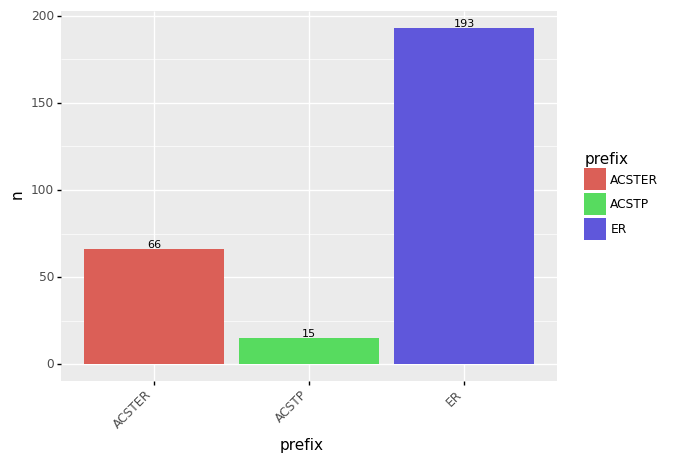

<ggplot: (8781964176890)>

In [52]:
(
    df_hc_prefix_count 
    >> ggplot(aes("prefix", "n", fill="prefix")) 
        + geom_col() 
        + theme(axis_text_x = element_text(angle = 45 , hjust=1))
        + geom_text(aes(label='n'),                                   
             size=8, va='bottom', format_string='{}')
)

In [53]:
df_hc >> filter(_.projectID == "32L0") >> count(_.seq) >> arrange(-_.n)

,seq,n
0,1,71
1,2,71
2,3,55
3,4,43
4,5,19
5,6,10
6,7,3
7,8,2


### Looking at Projects with 5904

In [54]:
df_hc >> filter(_.projectID == "5904")

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,...,0.00,Large,0,0,1,0,0,0,0,1
61,Obligated,BPMP,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,"21,619.00",...,0.00,Large,0,0,1,0,0,1,0,2
277,Obligated,BPMP,5904(121),Humboldt County,2018-11-02,2018-11-02,2018-11-02,2018-11-06,2018-11-07,"-81,905.86",...,0.00,Large,0,0,1,0,0,0,0,1
278,Obligated,RPSTPL,5904(143),Humboldt County,2018-07-06,2018-10-01,2018-11-06,2018-11-07,2018-11-07,"550,000.00",...,0.00,Large,1,0,0,0,0,0,0,1
467,Obligated,BPMP,5904(135),Humboldt County,2018-09-28,2018-09-28,2018-09-28,2018-10-10,2018-10-15,"-16,797.31",...,0.00,Large,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20984,Obligated,BRLO,5904(112),Humboldt County,2022-01-31,2022-02-14,2022-02-22,2022-02-24,2022-03-04,"305,000.00",...,0.00,Large,0,0,1,0,0,1,0,2
21234,DISTRICT,BRLS,5904(127),Humboldt County,2021-11-22,NaT,NaT,NaT,NaT,"44,351.32",...,0.00,Large,0,0,1,0,0,1,0,2
21235,DISTRICT,BPMP,5904(140),Humboldt County,2022-01-28,NaT,NaT,NaT,NaT,"286,067.43",...,0.00,Large,0,0,1,0,0,1,0,2
21236,DISTRICT,HSIPL,5904(181),Humboldt County,2021-10-20,NaT,NaT,NaT,NaT,"159,162.00",...,0.00,Large,1,0,0,0,0,0,0,1


In [55]:
df_hc >> filter(_.projectID == "5904", _.type_of_work.str.contains("Bridge"))

,location,prefix,project_no,agency,prepared_date,submit__to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,...,adjusted_ac_requested,obligation_cat,active_transp,transit,bridge,street,freeway,infra_resiliency_er,congestion_relief,work_categories
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,...,0.00,Large,0,0,1,0,0,0,0,1
61,Obligated,BPMP,5904(157),Humboldt County,2018-11-13,2018-12-06,2018-12-14,2018-12-14,2018-12-14,"21,619.00",...,0.00,Large,0,0,1,0,0,1,0,2
277,Obligated,BPMP,5904(121),Humboldt County,2018-11-02,2018-11-02,2018-11-02,2018-11-06,2018-11-07,"-81,905.86",...,0.00,Large,0,0,1,0,0,0,0,1
467,Obligated,BPMP,5904(135),Humboldt County,2018-09-28,2018-09-28,2018-09-28,2018-10-10,2018-10-15,"-16,797.31",...,0.00,Large,0,0,1,0,0,0,0,1
468,Obligated,BPMP,5904(139),Humboldt County,2018-08-31,2018-10-01,2018-10-10,2018-10-12,2018-10-15,"-123,758.02",...,0.00,Large,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20978,Obligated,BPMP,5904(157),Humboldt County,2022-01-26,2022-03-09,2022-03-11,2022-03-11,2022-03-16,"1,638.21",...,0.00,Large,0,0,1,0,0,1,0,2
20984,Obligated,BRLO,5904(112),Humboldt County,2022-01-31,2022-02-14,2022-02-22,2022-02-24,2022-03-04,"305,000.00",...,0.00,Large,0,0,1,0,0,1,0,2
21234,DISTRICT,BRLS,5904(127),Humboldt County,2021-11-22,NaT,NaT,NaT,NaT,"44,351.32",...,0.00,Large,0,0,1,0,0,1,0,2
21235,DISTRICT,BPMP,5904(140),Humboldt County,2022-01-28,NaT,NaT,NaT,NaT,"286,067.43",...,0.00,Large,0,0,1,0,0,1,0,2


In [56]:
## 88 rows of all bridge related funding obligations- appears from this small subset that HBPLOCAL is the FTIP Code, 
### yet, we have various Prefix Codes.

In [57]:
(df_hc 
    >> filter(_.projectID == "5904", _.type_of_work.str.contains("Bridge"))
    >> count(_.project_no) >> arrange(-_.n)
)

,project_no,n
11,5904(126),8
12,5904(127),8
4,5904(113),7
3,5904(112),5
5,5904(118),5
9,5904(122),5
16,5904(139),5
18,5904(141),5
2,5904(092),4
8,5904(121),4


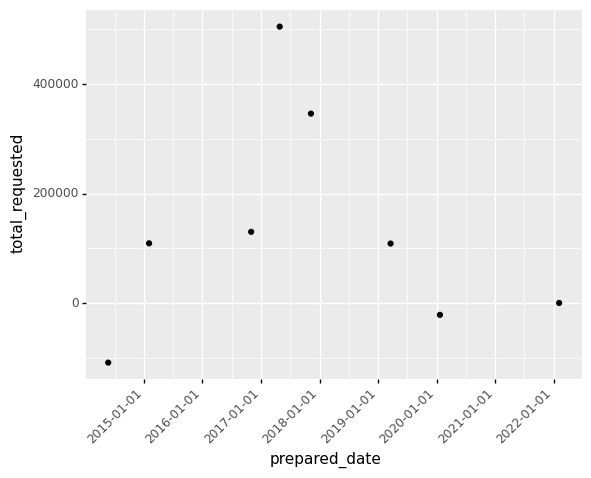

<ggplot: (8781976081077)>

In [58]:
## mplotting to see the timeline of one project 5904(126)
(df_hc 
    >> filter(_.project_no == "5904(126)")
    >> ggplot(aes("prepared_date", "total_requested")) + geom_point() + theme(axis_text_x = element_text(angle = 45 , hjust=1))
)